In [1]:
import folium
import requests
import matplotlib.pyplot as plt
import json
import pandas as pd
import foursquare

In [ ]:
places = ["14.73371, 121.06813", "14.73554, 121.01268", "14.72026, 120.96342", \
          "14.6922, 121.06212", "14.69037, 121.01732", "14.68954, 120.97063", \
          "14.65517, 121.05182", "14.65866, 121.01028", "14.64703, 120.9708", \
          "14.6364, 121.07414", "14.64819, 121.1174", "14.62361, 121.03998", \
          "14.61049, 120.9914", "14.60949, 121.10658", "14.60152, 121.05165", \
          "14.56946, 121.09491", "14.5776, 121.05972", "14.5771, 121.02865", \
          "14.5565, 121.02092", "14.55583, 121.02607", "14.55583, 121.02607", \
          "14.55002, 121.06126", "14.55002, 121.04581", "14.5241, 121.02127", \
          "14.47723, 121.02521", "14.44631, 121.00221", "14.40209, 121.02779",
          "14.40209, 121.02779", "14.60974, 121.08002", "14.64969, 121.0747"]
topics = ["fast food", "fastfood", "mcdo", "burger", "pizza", "chicken", "jollibee", "inasal"]

In [ ]:
len(places)

In [ ]:
# Construct the client object
client = foursquare.Foursquare(client_id='LK0U2PMB3ZFV3DH03TKBF2H04KUBRHFOZOZNHP5NWOESAALM', 
                               client_secret='PKNTSEUE5L4T533TSRI4JTNND3KQTOLGJAZVTTFT5EU3HCU4', 
                               redirect_uri='http://fondu.com/oauth/authorize')

# Build the authorization url for your app
auth_uri = client.oauth.auth_url()

In [ ]:
response = [client.venues.search(params={'query': topic, 
                                         'll': place,
                                        'radius': 2000,
                                        'limit': 30, 
                                        'intent': "browse", 
                                        'categoryId': '4d4b7105d754a06374d81259'})
            for place in places for topic in topics]

In [ ]:
len(response)

In [ ]:
data_list = []
for x in range(len(response)):
    try:
        for i in range(len(response[x]["venues"])):
            poi_id =  response[x]["venues"][i]["id"]
            poi_name =  response[x]["venues"][i]["name"]
            poi_lat =  response[x]["venues"][i]["location"]["lat"]
            poi_lng =  response[x]["venues"][i]["location"]["lng"]
            data_list.append([poi_id, poi_name, poi_lat, poi_lng])
    except KeyError:
        pass

df = pd.DataFrame(data_list, columns=["id", "name", "lat", "lng"])
df = df.drop_duplicates()
df["name"] = df['name'].str.lower()

In [27]:
df = pd.read_csv("data/coffeeshops.csv")

In [28]:
df.dtypes

id           object
name         object
lat         float64
lng         float64
checkins      int64
address      object
dtype: object

In [29]:
df
df = df.drop_duplicates()
df

,id,name,lat,lng,checkins,address
0,4b78d398f964a520cee32ee3,Starbucks Coffee,14.734710,121.057599,10428,"Ground Flr, SM City Fairview (Annex 1)"
1,53055beb498e87041e7204f9,Starbucks Coffee,14.735735,121.060213,3793,"Fairview Terraces, Quirino Hwy"
2,4bc1f1a6f8219c74a0f7b310,The Coffee Bean & Tea Leaf,14.736308,121.058135,17441,"G/F Gateway Mall, Gen Roxas Ave"
3,4e5b077352b1b78b81b213b9,Starbucks Coffee,14.734639,121.059474,4116,"2nd Flr, SM City Fairview (Main Bldg)"
4,4ceb3522e888f04d2161516b,Starbucks Coffee,14.553593,121.050662,40149,"Crossroads, Bonifacio Global City"
...,...,...,...,...,...,...
4549,4ba4e69ef964a520dac038e3,Starbucks Coffee,14.610225,121.079915,6875,"4th Flr, Eastwood Mall"
4557,4cc412bd3d7fa1cdb2a9a95f,Ghenne's Coffee Shop,14.603783,121.079698,208,Shopwise
4558,4e3758efd164374eb6867059,Dexter's Bakeshop & Coffee Shop,14.612650,121.070580,233,White Plains
4623,573d3faf498e71521269de67,Starbucks Coffee,14.650662,121.075041,698,U.P. Town Center 2


In [30]:
len(df)

313

In [31]:
df.head()

,id,name,lat,lng,checkins,address
0,4b78d398f964a520cee32ee3,Starbucks Coffee,14.734710,121.057599,10428,"Ground Flr, SM City Fairview (Annex 1)"
1,53055beb498e87041e7204f9,Starbucks Coffee,14.735735,121.060213,3793,"Fairview Terraces, Quirino Hwy"
2,4bc1f1a6f8219c74a0f7b310,The Coffee Bean & Tea Leaf,14.736308,121.058135,17441,"G/F Gateway Mall, Gen Roxas Ave"
3,4e5b077352b1b78b81b213b9,Starbucks Coffee,14.734639,121.059474,4116,"2nd Flr, SM City Fairview (Main Bldg)"
4,4ceb3522e888f04d2161516b,Starbucks Coffee,14.553593,121.050662,40149,"Crossroads, Bonifacio Global City"


<AxesSubplot: title={'center': 'Top 20 Coffeshops places by Number of Branches'}>

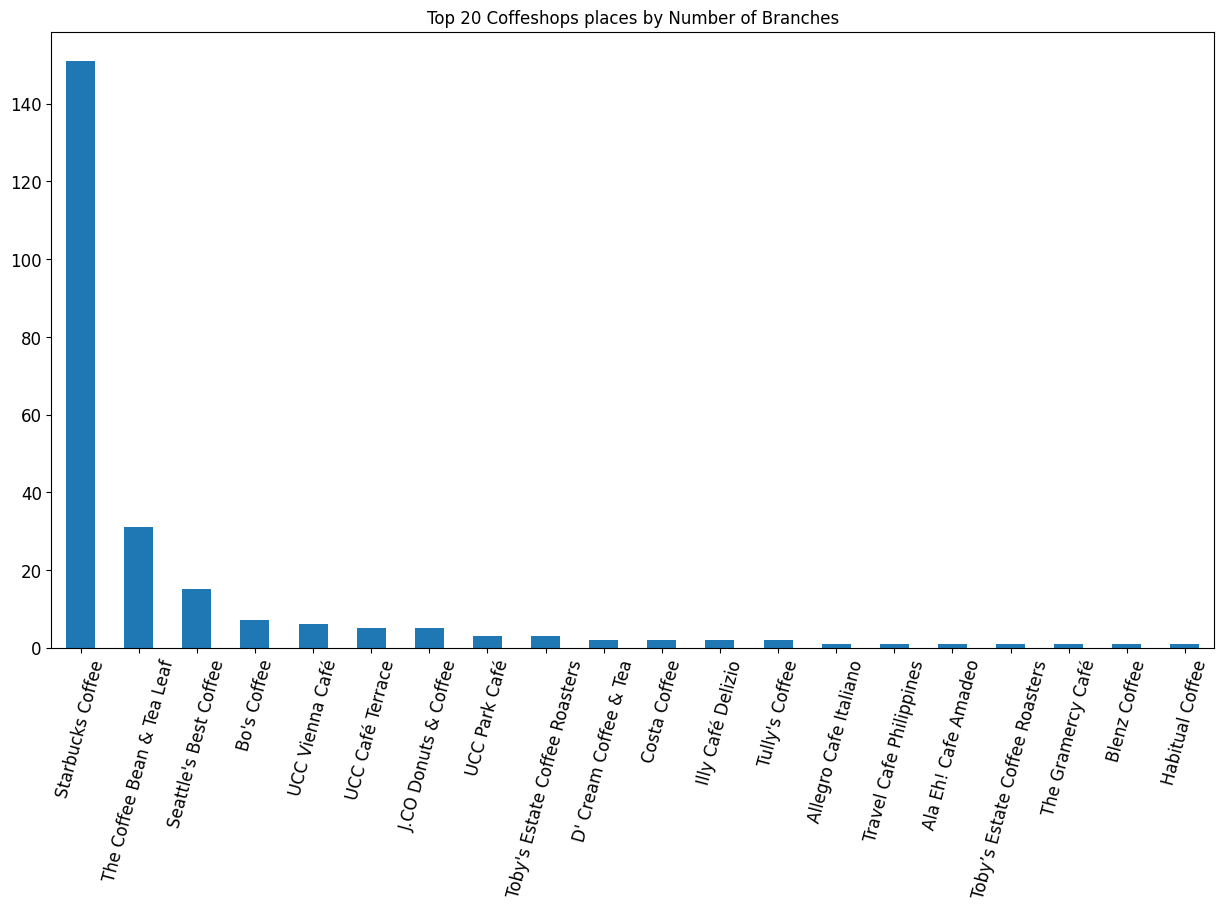

In [33]:
fig, ax = plt.subplots()
df['name'].value_counts().head(20).plot(ax=ax, kind='bar', \
                                        title ="Top 20 Coffeshops places by Number of Branches",figsize=(15,8), fontsize=12, rot=75)

In [34]:
basemap = folium.Map(location=[14.5562297,121.0204097], tiles="cartodb positron", zoom_start=15)

for index, row in df.iterrows():
    folium.CircleMarker([row["lat"], row["lng"]], radius=5,
        popup = folium.Popup(str(row["lat"]) + " " + str(row["lng"]), parse_html=True),
    fill=True).add_to(basemap)

basemap

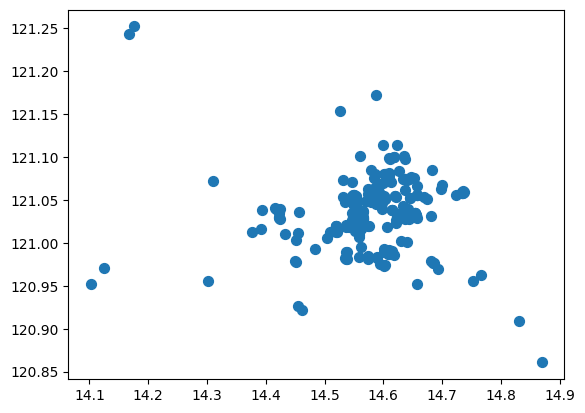

In [35]:
import numpy as np

X = np.array(df[["lat", "lng"]].values.tolist())
plt.scatter(X[:, 0], X[:, 1], s=50)

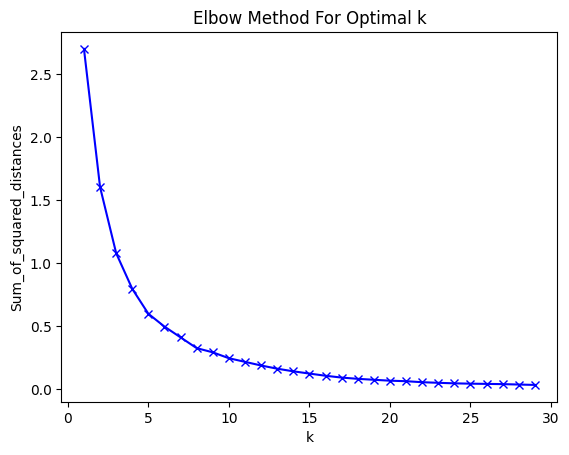

In [36]:
from sklearn.cluster import KMeans


sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

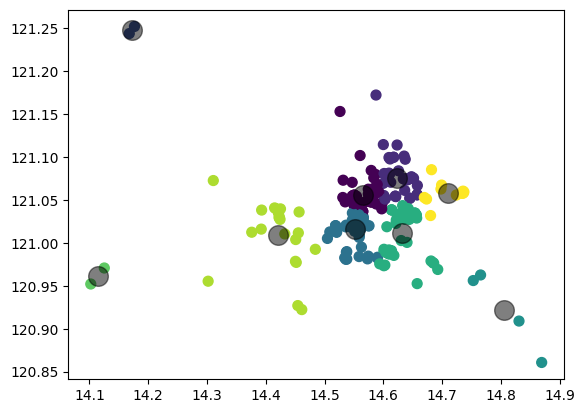

In [38]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [39]:
import seaborn as sns

df["kmeans_cluster"] = y_kmeans
palette = sns.color_palette("pastel", 9).as_hex()
color_getter = lambda x: palette[int(x)]
df["k_color"] = df["kmeans_cluster"].map(color_getter)
df.head()

,id,name,lat,lng,checkins,address,kmeans_cluster,k_color
0,4b78d398f964a520cee32ee3,Starbucks Coffee,14.734710,121.057599,10428,"Ground Flr, SM City Fairview (Annex 1)",8,#fffea3
1,53055beb498e87041e7204f9,Starbucks Coffee,14.735735,121.060213,3793,"Fairview Terraces, Quirino Hwy",8,#fffea3
2,4bc1f1a6f8219c74a0f7b310,The Coffee Bean & Tea Leaf,14.736308,121.058135,17441,"G/F Gateway Mall, Gen Roxas Ave",8,#fffea3
3,4e5b077352b1b78b81b213b9,Starbucks Coffee,14.734639,121.059474,4116,"2nd Flr, SM City Fairview (Main Bldg)",8,#fffea3
4,4ceb3522e888f04d2161516b,Starbucks Coffee,14.553593,121.050662,40149,"Crossroads, Bonifacio Global City",0,#a1c9f4


In [40]:
basemap = folium.Map(location=[14.5562297,121.0204097], tiles="cartodbdark_matter", zoom_start=15)

for index, row in df.iterrows():
    folium.CircleMarker([row["lat"], row["lng"]], radius=5,
    fill=True,
    color =row["k_color"],
                        popup = folium.Popup(row["name"], parse_html=True),
    fill_color=row["k_color"]).add_to(basemap)
    

basemap

In [41]:
import seaborn as sns

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.005, min_samples=4).fit(X)
y_dbscan = dbscan.labels_

In [42]:
y_dbscan

array([ 0,  0,  0,  0,  1,  0,  2, -1,  3, -1,  4, -1,  2,  1, -1, -1, -1,
        1,  5, -1,  2, -1, -1,  5,  2,  2, -1, -1, -1,  2,  2, -1, -1,  6,
        7, -1, -1, -1, -1, -1, -1,  7,  4, -1, -1,  8,  8,  1, -1, -1,  0,
        9, -1, 10, -1,  1, -1, 11, -1, -1, -1, 10,  1,  8, -1,  1, -1,  2,
        4,  3, -1, -1,  5,  2, 12,  7,  2, -1, -1,  2, 12, -1, -1,  6, -1,
        2,  6, -1, -1, -1, -1, 10, -1, -1,  6,  6,  6,  6, -1, -1, -1, -1,
       -1,  6,  6, -1, -1, -1,  3,  3,  3, 11, -1, -1,  6, 11, -1,  9,  6,
       -1, -1, -1, -1, 11, 11, -1, 11, 11,  5,  5, -1,  5,  5, -1, 11, 11,
       -1, 11,  7,  7, -1, -1, -1,  3, -1, -1,  9,  3, -1, -1, 10, 10, 10,
       10, 10, -1, 10, -1, -1, 10, 10, -1, 10, -1,  7,  7, -1, -1, -1,  9,
        9,  7, -1,  7,  9,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
       -1, -1, -1,  1,  1,  7,  7,  7,  7,  7, -1,  7, -1,  2,  2, -1,  2,
        2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2, -1,
       -1,  2,  2,  2,  2

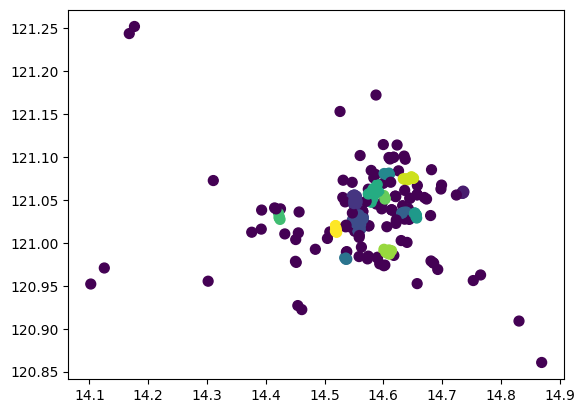

In [43]:
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='viridis')

In [44]:
import seaborn as sns

df["dbscan_cluster"] = y_dbscan
palette = sns.color_palette("pastel", len(y_dbscan)).as_hex()
color_getter = lambda x: palette[int(x)]
df["db_color"] = df["dbscan_cluster"].map(color_getter)
df.head()

,id,name,lat,lng,checkins,address,kmeans_cluster,k_color,dbscan_cluster,db_color
0,4b78d398f964a520cee32ee3,Starbucks Coffee,14.734710,121.057599,10428,"Ground Flr, SM City Fairview (Annex 1)",8,#fffea3,0,#a1c9f4
1,53055beb498e87041e7204f9,Starbucks Coffee,14.735735,121.060213,3793,"Fairview Terraces, Quirino Hwy",8,#fffea3,0,#a1c9f4
2,4bc1f1a6f8219c74a0f7b310,The Coffee Bean & Tea Leaf,14.736308,121.058135,17441,"G/F Gateway Mall, Gen Roxas Ave",8,#fffea3,0,#a1c9f4
3,4e5b077352b1b78b81b213b9,Starbucks Coffee,14.734639,121.059474,4116,"2nd Flr, SM City Fairview (Main Bldg)",8,#fffea3,0,#a1c9f4
4,4ceb3522e888f04d2161516b,Starbucks Coffee,14.553593,121.050662,40149,"Crossroads, Bonifacio Global City",0,#a1c9f4,1,#ffb482


In [45]:
df

,id,name,lat,lng,checkins,address,kmeans_cluster,k_color,dbscan_cluster,db_color
0,4b78d398f964a520cee32ee3,Starbucks Coffee,14.734710,121.057599,10428,"Ground Flr, SM City Fairview (Annex 1)",8,#fffea3,0,#a1c9f4
1,53055beb498e87041e7204f9,Starbucks Coffee,14.735735,121.060213,3793,"Fairview Terraces, Quirino Hwy",8,#fffea3,0,#a1c9f4
2,4bc1f1a6f8219c74a0f7b310,The Coffee Bean & Tea Leaf,14.736308,121.058135,17441,"G/F Gateway Mall, Gen Roxas Ave",8,#fffea3,0,#a1c9f4
3,4e5b077352b1b78b81b213b9,Starbucks Coffee,14.734639,121.059474,4116,"2nd Flr, SM City Fairview (Main Bldg)",8,#fffea3,0,#a1c9f4
4,4ceb3522e888f04d2161516b,Starbucks Coffee,14.553593,121.050662,40149,"Crossroads, Bonifacio Global City",0,#a1c9f4,1,#ffb482
...,...,...,...,...,...,...,...,...,...,...
4549,4ba4e69ef964a520dac038e3,Starbucks Coffee,14.610225,121.079915,6875,"4th Flr, Eastwood Mall",1,#ffb482,5,#debb9b
4557,4cc412bd3d7fa1cdb2a9a95f,Ghenne's Coffee Shop,14.603783,121.079698,208,Shopwise,1,#ffb482,5,#debb9b
4558,4e3758efd164374eb6867059,Dexter's Bakeshop & Coffee Shop,14.612650,121.070580,233,White Plains,1,#ffb482,-1,#8de5a1
4623,573d3faf498e71521269de67,Starbucks Coffee,14.650662,121.075041,698,U.P. Town Center 2,1,#ffb482,11,#ffb482


In [46]:
df_filtered = df[df["dbscan_cluster"] > -1]

In [50]:
basemap = folium.Map(location=[14.5562297,121.0204097], tiles="cartodbdark_matter", zoom_start=15)

for index, row in df_filtered.iterrows():
    folium.CircleMarker([row["lat"], row["lng"]], radius=5,
    fill=True,
    color =row["db_color"],
                        popup = folium.Popup(row["name"], parse_html=True),
    fill_color=row["db_color"]).add_to(basemap)
    

basemap

In [ ]:
## uid, home location, work location, call volume, data volume, sms volume, ARPU, device_rank

